In [69]:
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [12]:
XOM = pd.read_csv('XOM.csv')

In [64]:
XOM2 = XOM[XOM['Year'].isin([2019,2020])]

year = []
week = []
start_price = [list(XOM[XOM['Year'].isin([2018])]["Adj Close"])[-1]]
end_price = []
mu = []
sigma = []
label = []

week_sign = []
for i in [2019, 2020]:
    for j in range(53):
        subset = XOM2[(XOM2.Week_Number == j) & (XOM.Year == i)]
        n = subset.shape[0]
        sign = np.where(np.mean(subset.Return >= 0) >= 0.5, 'green', 'red')
        for k in range(n):
            week_sign.append(sign.tolist())
            
        year.append(i)
        week.append(j)
        start_price.append(list(subset["Adj Close"])[-1])
        end_price.append(list(subset["Adj Close"])[-1])
        mu.append(np.round(100*np.mean(subset.Return), 2))
        sigma.append(np.round(100*np.std(subset.Return), 2))
        label.append(sign)

start_price.pop() # delete the last adjusted close price        
XOM2['week_sign'] = week_sign            

In [65]:
XOM2.head()

,Date,Year,Month,Day,Weekday,Week_Number,Year_Week,Open,High,Low,Close,Volume,Adj Close,Return,Short_MA,Long_MA,week_sign
754,2019-01-02,2019,1,2,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,67.35,69.87,67.26,69.69,16727200.0,60.56,0.021997,61.530000,66.4856,green
755,2019-01-03,2019,1,3,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,70.00,70.25,68.36,68.62,13866100.0,59.63,-0.015354,61.070714,66.2680,green
756,2019-01-04,2019,1,4,<bound method PandasDelegate._add_delegate_acc...,0,2019-00,69.64,71.27,69.36,71.15,16043600.0,61.83,0.036870,60.709286,66.1084,green
757,2019-01-07,2019,1,7,<bound method PandasDelegate._add_delegate_acc...,1,2019-01,71.25,72.10,70.74,71.52,10844200.0,62.15,0.005200,60.457143,65.9778,green
758,2019-01-08,2019,1,8,<bound method PandasDelegate._add_delegate_acc...,1,2019-01,72.54,72.59,71.94,72.04,11439000.0,62.60,0.007271,60.332857,65.8944,green


In [66]:
mydata = pd.DataFrame({'year':year, 'week':week, 
                       'start_price':start_price, 'end_price':end_price,
                       'mu':mu, 'sigma':sigma, 'label':label})

In [67]:
mydata.head()

,year,week,start_price,end_price,mu,sigma,label
0,2019,0,59.25,61.83,1.45,2.20,green
1,2019,1,61.83,62.32,0.16,0.53,green
2,2019,2,62.32,63.43,0.35,0.51,green
3,2019,3,63.43,62.32,-0.43,0.78,green
4,2019,4,62.32,65.97,1.15,1.41,green


In [68]:
mydata.tail()

,year,week,start_price,end_price,mu,sigma,label
101,2020,48,39.52,40.98,0.78,3.22,green
102,2020,49,40.98,43.07,1.02,1.95,green
103,2020,50,43.07,42.02,-0.47,2.06,red
104,2020,51,42.02,40.91,-0.66,1.25,red
105,2020,52,40.91,40.53,-0.23,0.81,green


### Task 1: Based on "data_science_module_assignment_examine-labels.pdf"

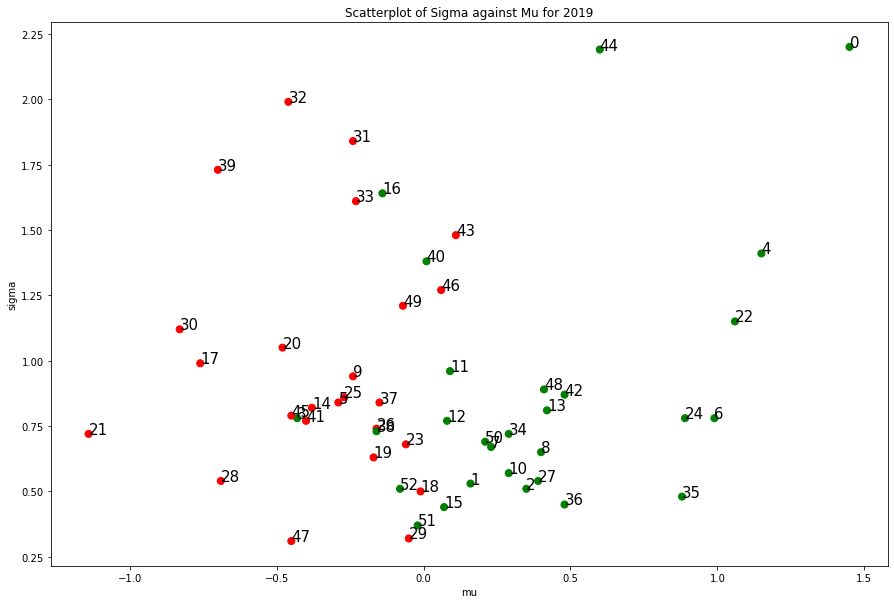

In [117]:
plot_data = mydata[mydata.year == 2019]
label_categories = np.where(plot_data.label == 'green', 0, 1)
colormap = np.array(['g', 'r'])

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for i, j, k in zip(plot_data.mu, plot_data.sigma, plot_data.week):
    ax.annotate(str(k), xy = (i,j), size = 15)
plt.scatter(plot_data.mu, plot_data.sigma, c = colormap[label_categories], s = 50)
plt.title('Scatterplot of Sigma against Mu for 2019')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()

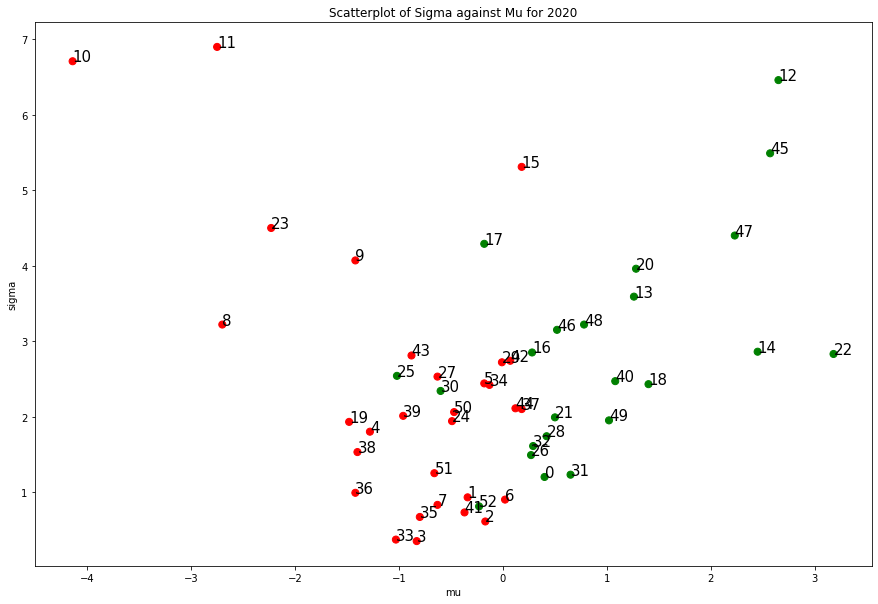

In [118]:
plot_data = mydata[mydata.year == 2020]
label_categories = np.where(plot_data.label == 'green', 0, 1)
colormap = np.array(['g', 'r'])

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for i, j, k in zip(plot_data.mu, plot_data.sigma, plot_data.week):
    ax.annotate(str(k), xy = (i,j), size = 15)
plt.scatter(plot_data.mu, plot_data.sigma, c = colormap[label_categories], s = 50)
plt.title('Scatterplot of Sigma against Mu for 2020')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()

##### 1.1 Are there any ”obvious” patterns? For example, for higher σ and μ are there more green points?

We notice that if $\mu$ is greater than 0, we have more green points. 

##### 1.2 Are points of the same color located close to each other?

Yes

##### 1.3 do patterns repeat from year 1 to year 2?

Yes, both figures show that most green points occur when $\mu$ is greater than 0

##### 1.4 do you expect nearest-neighbor classifier trained in year 1 to do well in year 2?

Yes since the patterns, and locations of the green and red points, are similar. 

### Task 2: Based on "data_science_module_trading_with_labels.pdf"

In [161]:
data2019 = mydata[mydata.year == 2019]
data2019.head()

,year,week,start_price,end_price,mu,sigma,label
0,2019,0,59.25,61.83,1.45,2.20,green
1,2019,1,61.83,62.32,0.16,0.53,green
2,2019,2,62.32,63.43,0.35,0.51,green
3,2019,3,63.43,62.32,-0.43,0.78,green
4,2019,4,62.32,65.97,1.15,1.41,green


In [162]:
data2020 = mydata[mydata.year == 2020].reset_index(drop = True)
data2020.head()

,year,week,start_price,end_price,mu,sigma,label
0,2020,0,63.54,64.04,0.40,1.20,green
1,2020,1,64.04,62.96,-0.34,0.93,red
2,2020,2,62.96,62.43,-0.17,0.61,red
3,2020,3,62.43,60.39,-0.83,0.35,red
4,2020,4,60.39,56.57,-1.28,1.80,red


Calculate the weekly balance for year 2019

In [163]:
balances_2019 = []

In [164]:
current_amount = 100
for i in range(data2019.shape[0]):
    if data2019.label[i] == 'green': 
        current_amount = current_amount*(1+((data2019.end_price[i]-data2019.start_price[i])/data2019.end_price[i]))
        balances_2019.append(current_amount)
    else:
        balances_2019.append(current_amount)

Calculate the weekly balance for year 2020

In [165]:
balances_2020 = []

In [166]:
current_amount = 100
for i in range(data2020.shape[0]):
    if data2020.label[i] == 'green': 
        current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.end_price[i]))
        balances_2020.append(current_amount)
    else:
        balances_2020.append(current_amount)

##### 2.1 What is the average and volatility of weekly balances?

In [168]:
print("The average of weekly balances in 2019 is %.2f" % np.mean(balances_2019))
print("The volatility of weekly balances in 2019 is %.2f" % np.var(balances_2019))

The average of weekly balances in 2019 is 134.48
The volatility of weekly balances in 2019 is 261.46


In [169]:
print("The average of weekly balances in 2020 is %.2f" % np.mean(balances_2020))
print("The volatility of weekly balances in 2020 is %.2f" % np.var(balances_2020))

The average of weekly balances in 2020 is 154.34
The volatility of weekly balances in 2020 is 1588.95


##### 2.2 plot the ”growth” of your account. Week numbers on x, account balance on y

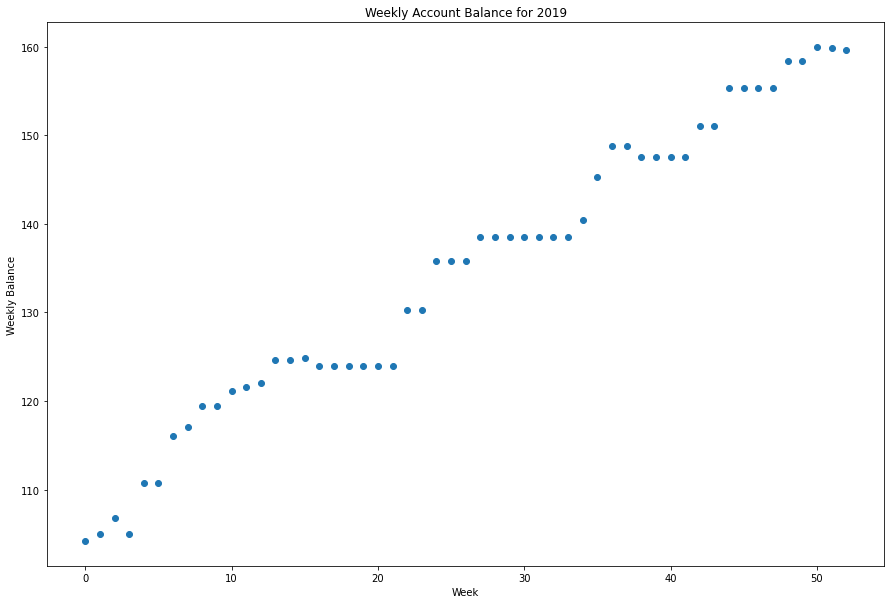

In [174]:
plt.figure(figsize = (15,10))
plt.scatter(data2019.week, balances_2019)
plt.xlabel("Week")
plt.ylabel("Weekly Balance")
plt.title("Weekly Account Balance for 2019")
plt.show()

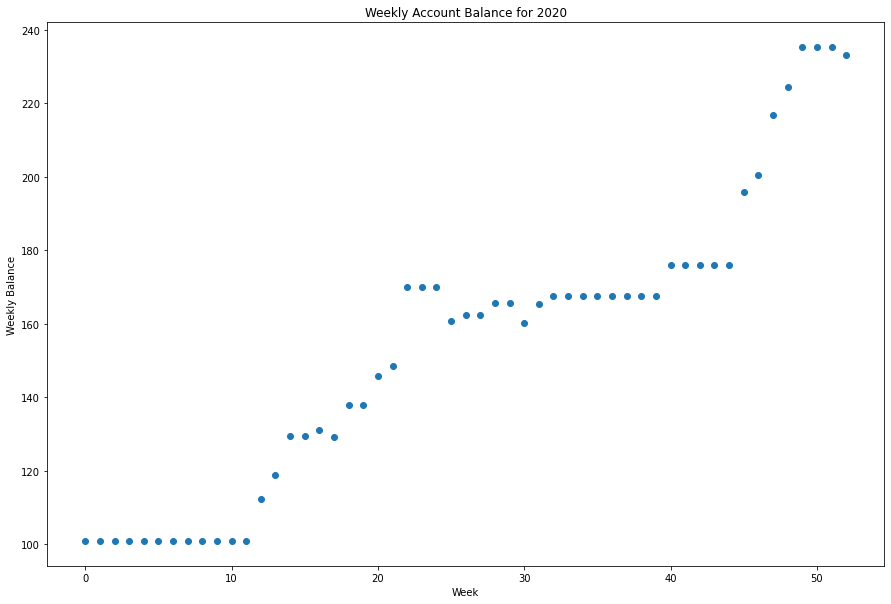

In [175]:
plt.figure(figsize = (15,10))
plt.scatter(data2020.week, balances_2020)
plt.xlabel("Week")
plt.ylabel("Weekly Balance")
plt.title("Weekly Account Balance for 2020")
plt.show()

##### 2.3 what (and when) was the min & max of the account?

In [180]:
print("In 2019, the minimum value of the account is %.2f at week %d" % (np.min(balances_2019), np.argmin(balances_2019)))
print("In 2019, the maximum value of the account is %.2f at week %d" % (np.max(balances_2019), np.argmax(balances_2019)))

In 2019, the minimum value of the account is 104.17 at week 0
In 2019, the maximum value of the account is 160.00 at week 50


In [181]:
print("In 2020, the minimum value of the account is %.2f at week %d" % (np.min(balances_2020), np.argmin(balances_2020)))
print("In 2020, the maximum value of the account is %.2f at week %d" % (np.max(balances_2020), np.argmax(balances_2020)))

In 2020, the minimum value of the account is 100.78 at week 0
In 2020, the maximum value of the account is 235.39 at week 49


##### 2.4 what was the final value of the account?

In [183]:
print("In 2019, the final value of the account is %.2f." % balances_2019[-1])
print("In 2020, the final value of the account is %.2f." % balances_2020[-1])

In 2019, the final value of the account is 159.62.
In 2020, the final value of the account is 233.19.


##### 2.5 what was the maximum duration (in weeks) that your ac- count was growing and what was the maximum duration (in weeks) that your account was decreasing in value?

In [247]:
from itertools import groupby
def len_iter(x):
    return sum(1 for i in x)

In [248]:
ind_incresing_2019 = np.array(balances_2019[1:])-np.array(balances_2019[:-1]) > 0
ind_incresing_2020 = np.array(balances_2020[1:])-np.array(balances_2020[:-1]) > 0

In [249]:
max_increase_duration_2019 = max(len_iter(run) for val, run in groupby(ind_incresing_2019) if val)
max_decrease_duration_2019 = max(len_iter(run) for val, run in groupby(~ind_incresing_2019) if val)

In [256]:
max_increase_duration_2020 = max(len_iter(run) for val, run in groupby(ind_incresing_2020) if val)
max_decrease_duration_2020 = max(len_iter(run) for val, run in groupby(~ind_incresing_2020) if val)

In [257]:
print("In 2019, the maximum duration the account was growing is %d weeks" % max_increase_duration_2019)
print("In 2019, the maximum duration the account was decreasing is %d weeks" % max_decrease_duration_2019)

In 2019, the maximum duration the account was growing is 4 weeks
In 2019, the maximum duration the account was decreasing is 6 weeks


In [258]:
print("In 2020, the maximum duration the account was growing is %d weeks" % max_increase_duration_2020)
print("In 2020, the maximum duration the account was decreasing is %d weeks" % max_decrease_duration_2020)

In 2020, the maximum duration the account was growing is 5 weeks
In 2020, the maximum duration the account was decreasing is 11 weeks


### Task 3: Based on "data_science-module-assignment_separate_points.pdf"

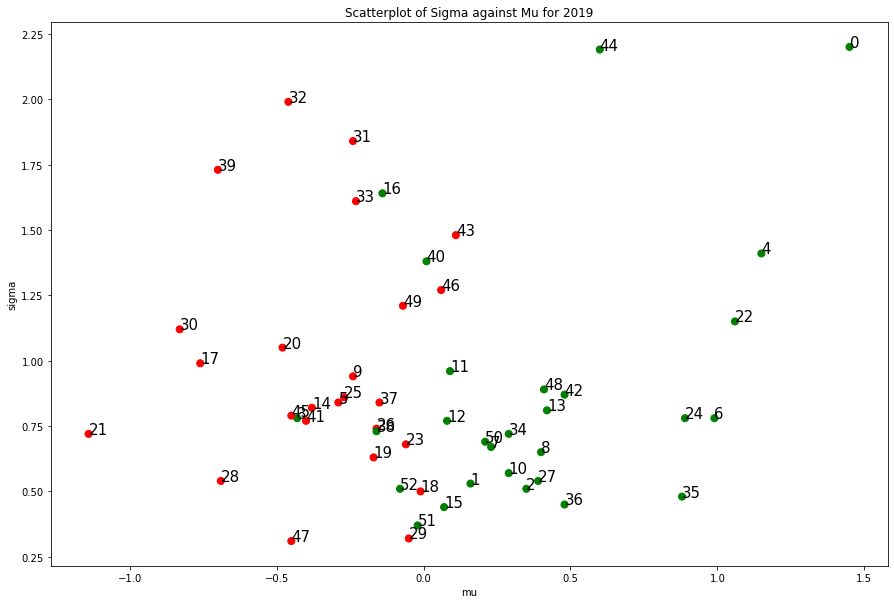

In [259]:
plot_data = mydata[mydata.year == 2019]
label_categories = np.where(plot_data.label == 'green', 0, 1)
colormap = np.array(['g', 'r'])

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for i, j, k in zip(plot_data.mu, plot_data.sigma, plot_data.week):
    ax.annotate(str(k), xy = (i,j), size = 15)
plt.scatter(plot_data.mu, plot_data.sigma, c = colormap[label_categories], s = 50)
plt.title('Scatterplot of Sigma against Mu for 2019')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()

##### 3.1 take year 1 and examine the plot of your labels. Construct a reduced dataset by removing some green and red points so thatyou can draw a line separating the points. Compute the equation of such a line (many solutiuons are possible)

In [279]:
week_to_remove = [16, 40, 3, 38, 52, 18]

In [284]:
pt1 = plot_data[plot_data.week == 29]
pt2 = plot_data[plot_data.week == 43]

In [307]:
x1 = np.array(pt1.mu)
x2 = np.array(pt2.mu)
y1 = np.array(pt1.sigma)
y2 = np.array(pt2.sigma)

In [308]:
xval = np.array([-0.05, 0.11])

In [309]:
m, b = np.polyfit(np.array([-0.05, 0.11]), np.array([0.32, 1.48]), 1)

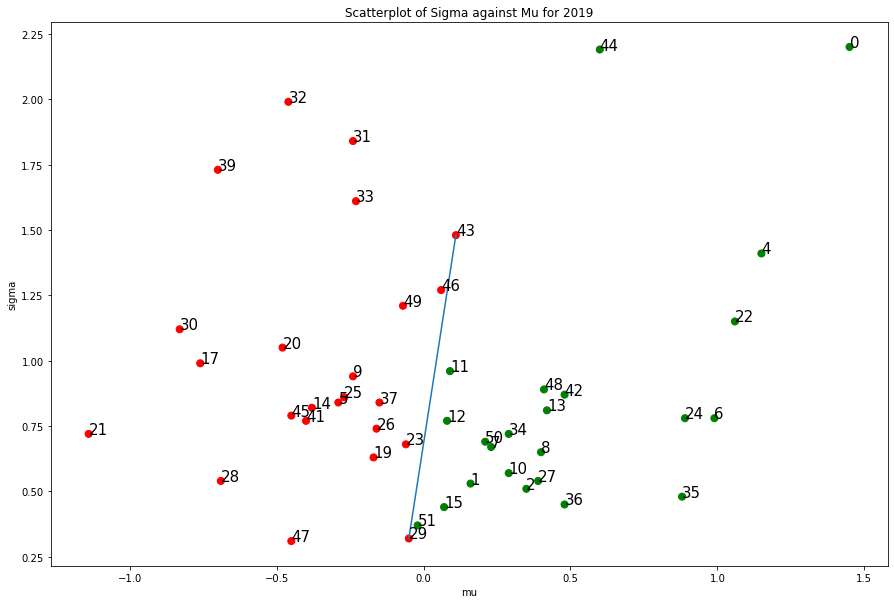

In [310]:
plot_data_clean = plot_data[~plot_data.week.isin(week_to_remove)]
label_categories = np.where(plot_data_clean.label == 'green', 0, 1)
colormap = np.array(['g', 'r'])

fig, ax = plt.subplots()
fig.set_size_inches(15,10)
for i, j, k in zip(plot_data_clean.mu, plot_data_clean.sigma, plot_data_clean.week):
    ax.annotate(str(k), xy = (i,j), size = 15)
plt.scatter(plot_data_clean.mu, plot_data_clean.sigma, c = colormap[label_categories], s = 50)
plt.plot(xval, m*xval+b)
plt.title('Scatterplot of Sigma against Mu for 2019')
plt.xlabel('mu')
plt.ylabel('sigma')
plt.show()

##### 3.2 take this line and use it to assign labels for year 2

In [314]:
print("The intercept and slope of the line in previous part is %.4f and %.4f respectively." % (b, m))

The intercept and slope of the line in previous part is 0.6825 and 7.2500 respectively.


In [319]:
new_label_2020 = []
for i in range(data2020.shape[0]):
    if m*data2020.mu[i]+b < data2020.sigma[i]:
        new_label_2020.append("red")
    else:
        new_label_2020.append("green")

##### 3.3 implement a trading strategy based on your labels for year 2.

Using the same trading strategy from previous task, i.e. starting with $100, we have

In [327]:
balances_2020 = []
current_amount = 100
for i in range(len(new_label_2020)):
    if new_label_2020[i] == 'green': 
        current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.end_price[i]))
        balances_2020.append(current_amount)
    else:
        balances_2020.append(current_amount)

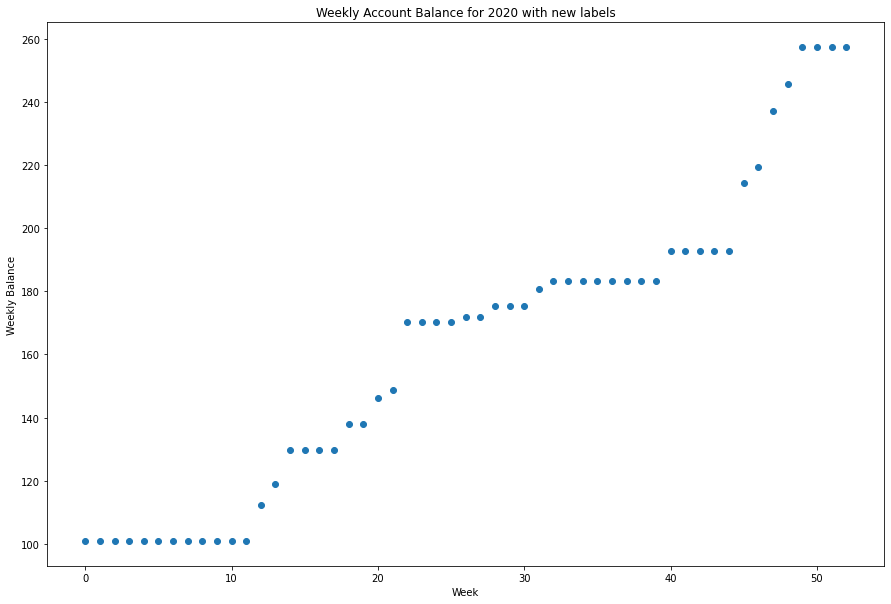

In [330]:
plt.figure(figsize = (15,10))
plt.scatter(data2020.week, balances_2020)
plt.xlabel("Week")
plt.ylabel("Weekly Balance")
plt.title("Weekly Account Balance for 2020 with new labels")
plt.show()

### Task 4: Based on "data_science_assignment_stock_knn.pdf"

##### 4.1 take k = 3,5,7,9,11. For each value of k compute the accuracy of your k-NN classifier on year 1 data. On x axis you plot k and on y-axis you plot accuracy. What is the optimal value of k for year 1?

In [331]:
from sklearn.neighbors import KNeighborsClassifier

In [362]:
X_train = data2019[['mu', 'sigma']]
y_train = np.where(data2019[['label']] == "green", 1, 0)
X_test = data2020[['mu', 'sigma']]
y_test = np.where(data2020[['label']] == "green", 1, 0)

In [371]:
k_list = [3,5,7,9,11]
accuracy = []
for k in k_list:
    neigh = KNeighborsClassifier(n_neighbors = k)
    neigh.fit(X_train, y_train)
    y_pred = neigh.predict(X_train)
    accuracy.append(np.mean(y_pred == y_train))

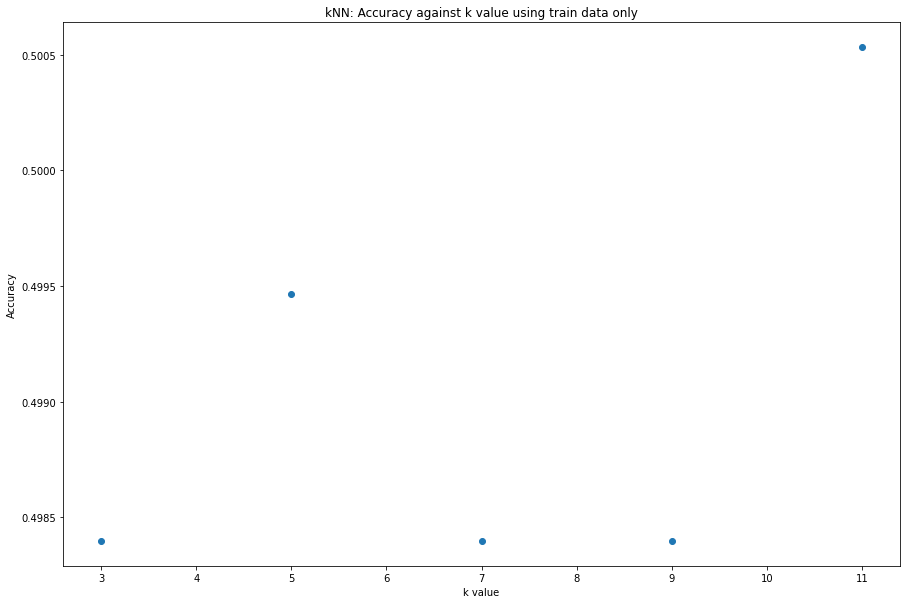

In [372]:
plt.figure(figsize = (15,10))
plt.scatter(k_list, accuracy)
plt.xlabel("k value")
plt.ylabel("Accuracy")
plt.title("kNN: Accuracy against k value using train data only")
plt.show()

Based on the accuracy of the classifer on year 1 data (i.e. year 2019), the optimal value of k is 11. 

##### 4.2 use the optimal value of k from year 1 to predict labels for year 2. What is your accuracy?

In [373]:
neigh = KNeighborsClassifier(n_neighbors = 11)
neigh.fit(X_train, y_train)
y_pred = neigh.predict(X_test)
acc = np.mean(y_pred == y_test)

In [380]:
print("With the optimal value k=11, the accuracy on the test data is %.2f%%." % (100*acc))

With the optimal value k=11, the accuracy on the test data is 52.62%.


##### 4.3 using the optimal value for k from year 1, compute the confusion matrix for year 2

In [397]:
TP = np.sum(y_pred[np.squeeze(y_test) == 1] == 1)
FP = np.sum(y_pred[np.squeeze(y_test) == 0] == 1)
TN = np.sum(y_pred[np.squeeze(y_test) == 0] == 0)
FN = np.sum(y_pred[np.squeeze(y_test) == 1] == 0)

In [400]:
print("The true positive is %d." % TP)
print("The true negative is %d." % TN)
print("The false positive is %d." % FP)
print("The false negative is %d." % FN)

The true positive is 16.
The true negative is 30.
The false positive is 0.
The false negative is 7.


##### Confusion Matrix 

|  | True Label |  
---| --- | --- | ---
| | Green | Red 
Predict Label | Green | 16 | 0 
 | Red | 7 | 30 


##### 4.4 what is true positive rate (sensitivity or recall) and true negative rate (specificity) for year 2?

In [405]:
print("The true positive rate is %.2f%%." % (100*TP/(TP+FN)))

The true positive rate is 69.57%.


In [406]:
print("The true negative rate is %.2f%%." % (100*TN/(TN+FP)))

The true negative rate is 100.00%.


##### 4.5 implement a trading strategy based on your labels for year 2 and compare the performance with the ”buy-and-hold” strategy. Which strategy results in a larger amount at the end of the year?

Using the same trading strategy from previous task, i.e. starting with $100, we have

In [408]:
knn_label = np.where(y_pred == 1, "green", "red")

balances_2020 = []
current_amount = 100
for i in range(len(knn_label)):
    if knn_label[i] == 'green': 
        current_amount = current_amount*(1+((data2020.end_price[i]-data2020.start_price[i])/data2020.end_price[i]))
        balances_2020.append(current_amount)
    else:
        balances_2020.append(current_amount)

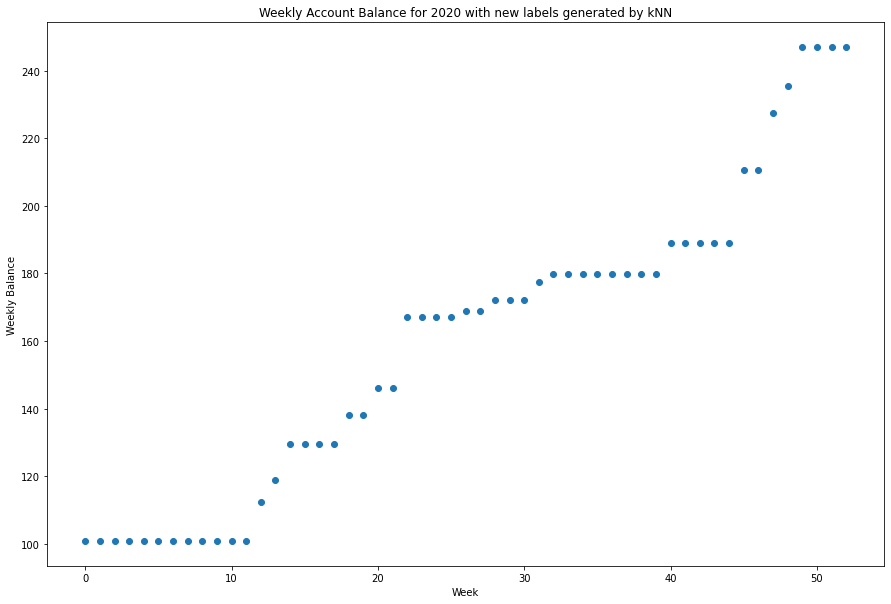

In [409]:
plt.figure(figsize = (15,10))
plt.scatter(data2020.week, balances_2020)
plt.xlabel("Week")
plt.ylabel("Weekly Balance")
plt.title("Weekly Account Balance for 2020 with new labels generated by kNN")
plt.show()

In [419]:
print("Using the trading strategy with the labels from kNN, the final account balance is $%.2f." % balances_2020[-1])

Using the trading strategy with the labels from kNN, the final account balance is $247.06.


Using the 'buy-and-hold' strategy

In [415]:
end_Price = data2020.end_price[data2020.shape[0]-1]
start_Price = data2020.end_price[0]
buy_and_hold_amount = 100*(1+((end_Price-start_Price)/start_Price))

In [420]:
print("Using the buy-and-hold strategy, the final account balance is $%.2f." % buy_and_hold_amount)

Using the buy-and-hold strategy, the final account balance is $63.29.


Final verdict, the trading strategy results in a larger amount at the end of the year. 